Word2Vec是Google研究团队里的Tomas Mikolov等人于2013年提出的一种高效训练词向量的模型，基本出发点是上下文相似的两个词，它们的词向量也应该相似，比如香蕉和梨在句子中可能经常出现在相同的上下文中，因此这两个词的表示向量应该就比较相似。

Word2Vec的最终目的不是为了得到一个语言模型，也不是要把模型训练得多么完美，而是只关心模型训练完后的副产物：模型参数(这里特指神经网络的权重)，并将这些参数作为输入 x 的某种向量化的表示，这个向量便叫做——词向量。

包括两种主要的模型架构：

CBOW (Continuous Bag of Words)连续词袋模型：基于上下文预测目标词。  
Skip-Gram连续跳字模型：基于目标词预测上下文。

CBOW 模型  
目标：给定上下文中的若干单词，预测目标单词。  
特点：对小型数据集更高效，效果稳定。  
例子：对于句子“我喜欢学习机器学习”，上下文是“我”和“学习”，CBOW 的目标是预测“喜欢”。  

Skip-Gram 模型  
目标：给定一个目标单词，预测其上下文。  
特点：在处理大型语料库和稀疏数据时表现更好。  
例子：对于目标单词“喜欢”，Skip-Gram 的目标是预测“我”和“学习”。

Word2Vec 的实现步骤  
- 预处理文本数据：

分词  
去除停用词  
构建词汇表  
- 训练模型：

初始化词向量矩阵（随机值）  
构建滑动窗口获取训练样本  
使用神经网络进行训练：  
输入层：词汇表大小的独热向量  
隐藏层：低维嵌入空间  
输出层：预测的目标单词或上下文单词  
- 优化：

损失函数：负对数似然（Negative Log-Likelihood）  
优化方法：随机梯度下降（SGD）  
- 词向量生成：

训练完成后，隐藏层的权重矩阵即为词向量。



In [1]:
from gensim.models.keyedvectors import KeyedVectors
w2v_model = KeyedVectors.load_word2vec_format("../../../../../data/03.nlp/chinese_word_vector/sgns.literature.word.bz2", binary=False,unicode_errors='ignore')
print(w2v_model)

KeyedVectors<vector_size=300, 187959 keys>


In [2]:
from gensim.models import KeyedVectors

# 使用示例
word = "苏轼"
if word in w2v_model:
    print(f"{word} 的词向量：", w2v_model[word])
    similar_words = w2v_model.most_similar(word, topn=5)
    print(f"与 {word} 最相似的词：", similar_words)
else:
    print(f"词 {word} 不在词表中")

苏轼 的词向量： [-0.216992  0.169266 -0.022124  0.352207  0.090009 -0.203597 -0.198603
  0.017558 -0.049157 -0.513865 -0.078457  0.195531  0.250796 -0.053944
 -0.061069 -0.098501  0.392494 -0.0258   -0.256516 -0.034831  0.421554
  0.458206 -0.288215  0.052015  0.021333 -0.104793  0.086656 -0.098294
 -0.266411  0.102593 -0.144746 -0.353704 -0.052491 -0.472925 -0.161513
 -0.396042  0.15336  -0.339484  0.195164  0.122997  0.140972 -0.091808
  0.288646  0.169173 -0.134016 -0.258362 -0.015973  0.072096  0.057265
  0.0414   -0.332689  0.114702 -0.156655 -0.069936 -0.141487 -0.119378
 -0.486296  0.003796  0.069728 -0.731504  0.09829   0.056567 -0.168934
 -0.022115 -0.157404  0.290234 -0.274686  0.039205  0.161927 -0.031725
 -0.404814  0.18551   0.081603  0.471032  0.444482  0.430121 -0.269486
  0.485611 -0.243346 -0.131989 -0.150755  0.695316 -0.082887  0.321942
  0.145527  0.025784  0.394076  0.070004  0.36686   0.019678  0.269366
  0.17915  -0.021759  0.00926   0.148433 -0.027877 -0.708266  0.1411

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 确保导入 PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 设置支持中文的字体路径（这里以 SimHei 为例）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

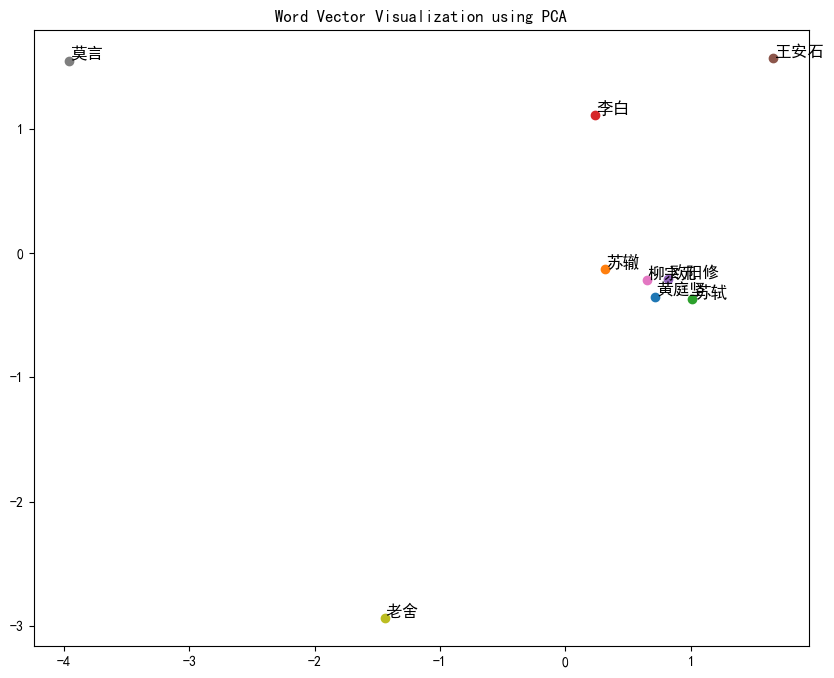

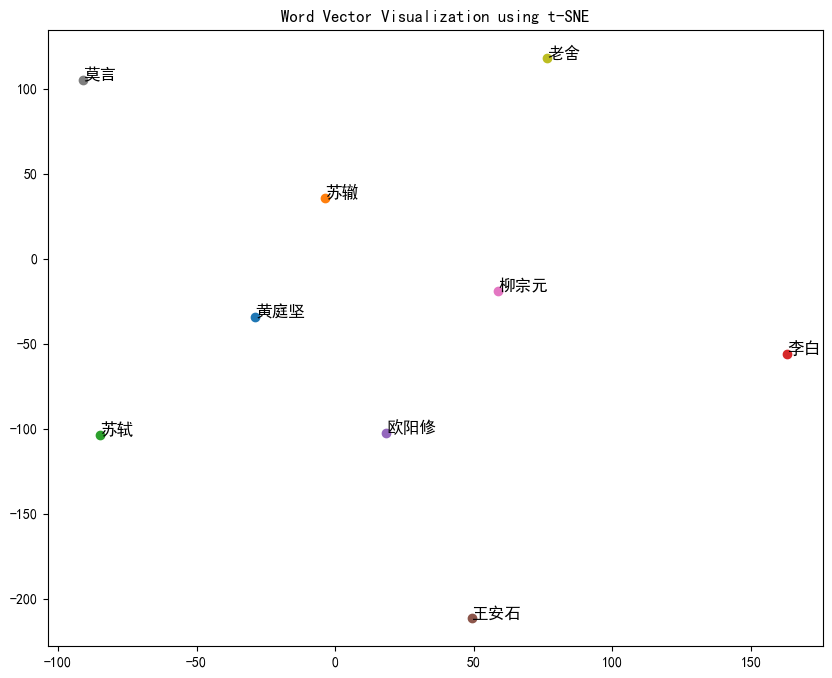

In [16]:
# 2. 选择要可视化的词
words = ['黄庭坚', '苏辙', '苏轼', '李白', '欧阳修', '王安石', '柳宗元', '莫言', '老舍']
word_vectors = np.array([w2v_model[word] for word in words])

# 3. 使用 PCA 降维到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# 4. 绘制 PCA 可视化结果
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(pca_result[i, 0], pca_result[i, 1])
    plt.text(pca_result[i, 0] + 0.01, pca_result[i, 1] + 0.01, word, fontsize=12)
plt.title("Word Vector Visualization using PCA")
plt.show()

# 5. 使用 t-SNE 降维到 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_result = tsne.fit_transform(word_vectors)

# 6. 绘制 t-SNE 可视化结果
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
    plt.text(tsne_result[i, 0] + 0.01, tsne_result[i, 1] + 0.01, word, fontsize=12)
plt.title("Word Vector Visualization using t-SNE")
plt.show()

In [20]:
keyed_vectors = KeyedVectors.load_word2vec_format("../../../../../data/03.nlp/chinese_word_vector/sgns.literature.word.bz2", binary=False,unicode_errors='ignore')
print(keyed_vectors)

KeyedVectors<vector_size=300, 187959 keys>


In [38]:
# 初始化Word2Vec模型，设置vector_size和其他参数与KeyedVectors一致
model = Word2Vec(vector_size=keyed_vectors.vector_size, min_count=1)

# 手动构建词汇表
model.build_vocab([list(keyed_vectors.key_to_index.keys())])

# 替换原模型的词向量
model.wv.vectors = keyed_vectors.vectors

In [39]:
# 直接跳过 finalize_vocab，这样模型会锁定当前的词汇表
print(f"词汇表大小: {len(model.wv)}")

词汇表大小: 187959


In [40]:
model.vector_size

300

In [43]:
# 新词及其向量
new_words = ["新词1", "新词2", "新词3", "曹宇宇"]
new_vectors = np.random.rand(len(new_words), model.vector_size)  # 随机初始化

# 批量添加新词和向量
model.wv.add_vectors(new_words, new_vectors)

print(f"批量添加新词后，词汇表大小: {len(model.wv)}")

批量添加新词后，词汇表大小: 187963


In [44]:
model.wv["曹宇宇"]

array([0.94564265, 0.02264612, 0.23281792, 0.73816544, 0.6058585 ,
       0.7315733 , 0.04854194, 0.39177847, 0.8437572 , 0.0365763 ,
       0.14101303, 0.8528422 , 0.57293004, 0.22290213, 0.20918031,
       0.10144439, 0.43435785, 0.8235619 , 0.86060894, 0.5917754 ,
       0.24133153, 0.16525316, 0.2937194 , 0.04296586, 0.50786793,
       0.32573792, 0.72348076, 0.8542054 , 0.28232288, 0.32372957,
       0.856695  , 0.6268503 , 0.5602434 , 0.26329222, 0.66891396,
       0.984087  , 0.2691034 , 0.02454857, 0.16908585, 0.3786391 ,
       0.10849372, 0.12473641, 0.8186991 , 0.14720476, 0.8547983 ,
       0.88119113, 0.6738951 , 0.9059353 , 0.22585101, 0.04078578,
       0.6456815 , 0.9317878 , 0.34287396, 0.86340296, 0.40643921,
       0.26721245, 0.850558  , 0.6183791 , 0.07217415, 0.7856296 ,
       0.81057924, 0.34971774, 0.28052887, 0.67102486, 0.4697688 ,
       0.29006824, 0.3802514 , 0.731354  , 0.85348165, 0.2484509 ,
       0.33785182, 0.8883914 , 0.9912246 , 0.6355749 , 0.31006

In [45]:
# 重新构建词汇表，但不需要重建已有词的向量
model.build_vocab(new_words, update=True)

In [46]:
# 进行微调
model.train(new_words, total_examples=len(new_words), epochs=1000)

# 打印结果，验证新词的向量是否更新
print("新词1的向量:", model.wv["曹宇宇"])

新词1的向量: [0.94564265 0.02264612 0.23281792 0.73816544 0.6058585  0.7315733
 0.04854194 0.39177847 0.8437572  0.0365763  0.14101303 0.8528422
 0.57293004 0.22290213 0.20918031 0.10144439 0.43435785 0.8235619
 0.86060894 0.5917754  0.24133153 0.16525316 0.2937194  0.04296586
 0.50786793 0.32573792 0.72348076 0.8542054  0.28232288 0.32372957
 0.856695   0.6268503  0.5602434  0.26329222 0.66891396 0.984087
 0.2691034  0.02454857 0.16908585 0.3786391  0.10849372 0.12473641
 0.8186991  0.14720476 0.8547983  0.88119113 0.6738951  0.9059353
 0.22585101 0.04078578 0.6456815  0.9317878  0.34287396 0.86340296
 0.40643921 0.26721245 0.850558   0.6183791  0.07217415 0.7856296
 0.81057924 0.34971774 0.28052887 0.67102486 0.4697688  0.29006824
 0.3802514  0.731354   0.85348165 0.2484509  0.33785182 0.8883914
 0.9912246  0.6355749  0.3100693  0.14130381 0.71679074 0.13029434
 0.8514451  0.44406578 0.7539858  0.04213607 0.59669346 0.49332523
 0.5109418  0.9798395  0.12028132 0.18379255 0.40063784 0.4560

In [34]:
model.epochs

5

In [37]:
import jieba

# 示例句子
new_sentences_raw = [
    "曹宇宇出现在这句话中。",
    "我们需要对曹宇宇进行分词。",
    "这是另一个包含曹宇宇的例子。"
]

# 对每个句子分词，并存储为列表
new_sentences = [list(jieba.cut(sentence)) for sentence in new_sentences_raw]

print(new_sentences)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\caoyuyu\AppData\Local\Temp\jieba.cache
Loading model cost 0.712 seconds.
Prefix dict has been built successfully.


[['曹宇宇', '出现', '在', '这句', '话', '中', '。'], ['我们', '需要', '对', '曹宇宇', '进行', '分词', '。'], ['这', '是', '另', '一个', '包含', '曹宇宇', '的', '例子', '。']]


In [1]:
# 重新构建词汇表并更新（假设前面已经添加了新词）
model.build_vocab(new_sentences, update=True)

# 微调模型
model.train(new_sentences, total_examples=len(new_sentences), epochs=model.epochs)

NameError: name 'model' is not defined